what is the demand of certain job title over the course of a year in the US
The data is only in 2023

Learn to use .dt.strftime( format = "%B" "%b") to change the date format so we can graph it

learn to use pd.Categorical(ordered = True) to sort out a string value ordered list

learn to use .to_datetime(format=).dt.month to change it a string month to a number so it can be sorted. 

Other things are .drop columns

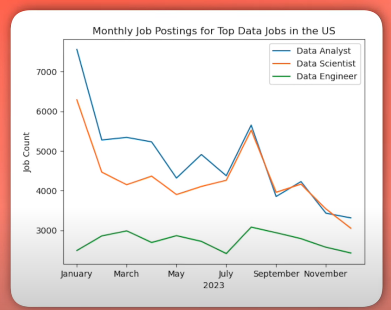

In [1]:
import pandas as pd
from datasets import load_dataset

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [2]:
#df.job_posted_date.sample(16)

#creating a new column for the month name. I knew that df.job_posted_date.dt.month gave the month number. 
#but chatgpt understood what i tried to do. strftime format %B full month name
df['job_posted_month_name'] = df['job_posted_date'].dt.strftime('%B')


In [3]:
df.job_posted_month_name

0            June
1         January
2         October
3            July
4          August
           ...   
785736      March
785737      March
785738      March
785739      March
785740      March
Name: job_posted_month_name, Length: 785741, dtype: object

In [4]:
df_usa = df[(df.job_country == 'United States') & (df.job_posted_date.dt.year == 2023)].copy()
#remember that the evaluation of true or false needs to be in () or else it would throw an ambiguous ]
# df_usa only gets job within the country of United States and only in year 2023


In [5]:
id(df)
#checking to usee if we need to use .copy()

2556239010704

In [6]:
df_usa.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_name
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"['python', 'qlik']","{'analyst_tools': ['qlik'], 'programming': ['p...",November
13,Senior Data Engineer,Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Texas, United States",2023-11-15 13:08:52,True,True,United States,None,NaN,NaN,Nayya,"['python', 'sql', 'go', 'ruby', 'ruby', 'javas...","{'cloud': ['aws'], 'other': ['terraform'], 'pr...",November
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",June
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None,September
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"['python', 'r', 'java']","{'programming': ['python', 'r', 'java']}",February


In [7]:
#when you perform a pivot table like in Excel, you wan tto graaph the data
#same here, thus, the index is your x values. In this case the month
#the columns are the job title short 
# values are the count() 
#recall that the aggfunc is what we want to use on the value

df_pivot_chatGPT = df.pivot_table(index = 'job_posted_month_name', columns='job_title_short', aggfunc = 'size')
df_pivot_Luke = df.pivot_table(index = 'job_posted_month_name', columns='job_title_short', aggfunc = 'size')

In [8]:
df_pivot_chatGPT

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month_name,,,,,,,,,,
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
December,4038,1152,13583,13303,12024,1254,1799,2878,2431,3841
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969


In [9]:
#we need to sort the job_posted_month_name as that can be sorted by number
#there is no sort_values for data in words like that. so a helper column is needed

#this is chatGPT version
# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'job_posted_month_name' to a categorical type with the correct order
df['job_posted_month_name'] = pd.Categorical(df['job_posted_month_name'], 
                                              categories=month_order, 
                                              ordered=True)

# Now you can create your pivot table, and it will respect the month order
df_pivot_chatGPT = df.pivot_table(index='job_posted_month_name', 
                             columns='job_title_short', 
                             aggfunc='size',
                             observed = False)

# Sort by the newly categorized month column
df_pivot_chatGPT.sort_index(level='job_posted_month_name', inplace=True)

In [10]:
df_pivot_chatGPT

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month_name,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499


In [11]:
#this is the luke version

#reseting the index so we can use that column 
df_pivot_Luke.reset_index(inplace=True)

#converting the str name of the month %B to a date-time format
#setting the column to a date time format first, then setting it to new column, then extracting the month only
df_pivot_Luke['month_no']=pd.to_datetime(df_pivot_Luke['job_posted_month_name'], format = '%B').dt.month.copy()


In [12]:
df_pivot_Luke

job_title_short,job_posted_month_name,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025,4
1,August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970,8
2,December,4038,1152,13583,13303,12024,1254,1799,2878,2431,3841,12
3,February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364,2
4,January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122,1
5,July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663,7
6,June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213,6
7,March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692,3
8,May,2408,480,13423,13646,11745,811,1925,3298,2399,1969,5
9,November,4751,1268,15230,14947,14220,1305,2117,3597,2788,4227,11


In [13]:
#sort by the month_no 
df_pivot_Luke.sort_values(by = 'month_no', inplace = True)

In [14]:
df_pivot_Luke

job_title_short,job_posted_month_name,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122,1
3,February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364,2
7,March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692,3
0,April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025,4
8,May,2408,480,13423,13646,11745,811,1925,3298,2399,1969,5
6,June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213,6
5,July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663,7
1,August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970,8
11,September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499,9
10,October,5000,1186,16239,15484,14151,1391,2317,3591,2908,4344,10


In [15]:
#cleaning up the columnes and setting back the index
#set index
df_pivot_Luke.set_index('job_posted_month_name', inplace=True)
#drop col month_no.
df_pivot_Luke.drop('month_no', axis=1, inplace=True)

In [16]:
#our data is finished.
df_pivot_Luke

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month_name,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499


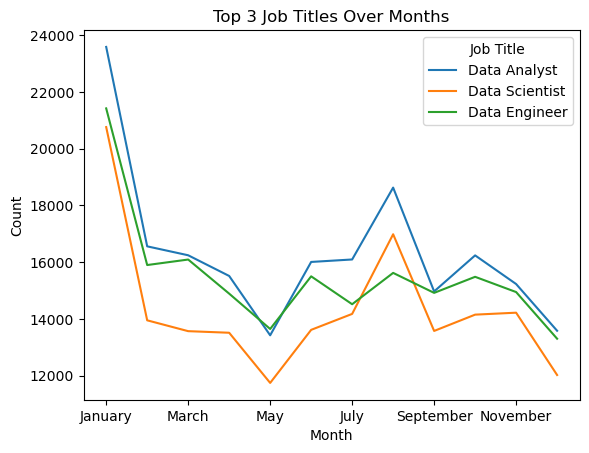

In [17]:
#graphing the data portion

#figure out the top 3 jobs since we only want top 3
top_3 = df_usa['job_title_short'].value_counts()[0:3].index

#plot the top_3 only
#with a pivot table you dont have to specify x and y
df_pivot_Luke[top_3].plot(kind='line')
plt.title('Top 3 Job Titles Over Months')
plt.ylabel('Count')
plt.xlabel('Month')
plt.legend(title='Job Title')
plt.show()